In [1]:
#Installing the scikit-learn library for importing required functions and modules.
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing the required libraries for EDA and modelling work.
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn. metrics import mean_squared_error, r2_score 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the California Housing Dataset from seaborn
california = fetch_california_housing()
# Convert the data to a pandas dataframe
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
# Add the target variable to the dataframe
california_df[ 'MedHouseVal'] = california.target
# Print the first 5 rows of the dataframe 
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
#Creating clone dataframe.
df=california_df.copy()

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [9]:
df.shape

(20640, 9)

In [10]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
#Data cleaning process

In [13]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

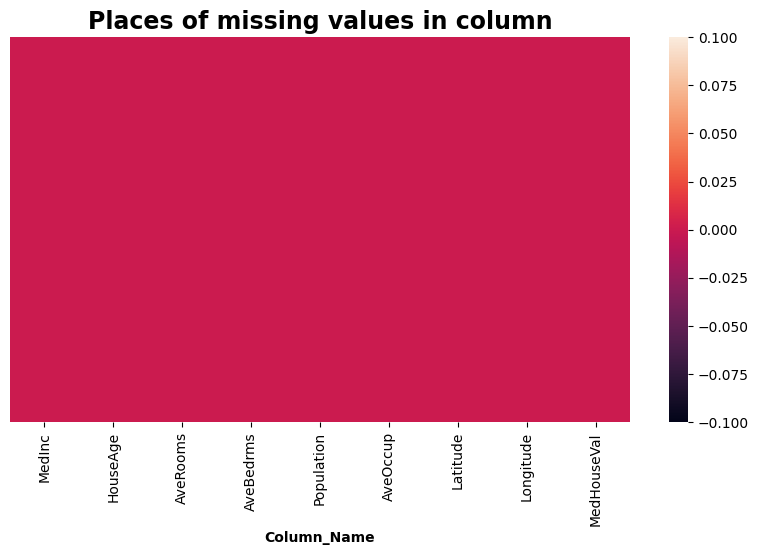

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=10, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

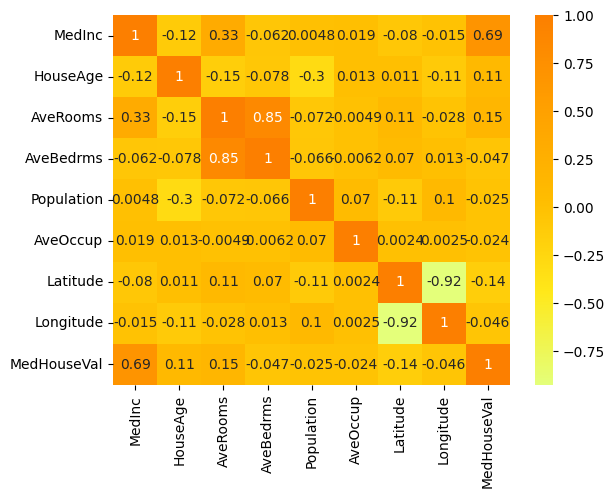

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [17]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df[[i for i in df.describe().columns if i not in ['MedHouseVal']]])

,variables,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [22]:
df1=df.copy()

In [23]:
df1_vif=df.copy()

In [25]:
df1_vif.drop(['Longitude'], axis=1, inplace=True)

In [26]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df1_vif[[i for i in df1_vif.describe().columns if i not in ['MedHouseVal']]])

,variables,VIF
0,MedInc,9.865861
1,HouseAge,6.880512
2,AveRooms,42.192223
3,AveBedrms,39.768396
4,Population,2.793169
5,AveOccup,1.094908
6,Latitude,22.498755


In [28]:
df2_vif=df1_vif.copy()

In [29]:
df2_vif.drop(['AveRooms'], axis=1, inplace=True)

In [30]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df2_vif[[i for i in df2_vif.describe().columns if i not in ['MedHouseVal']]])

,variables,VIF
0,MedInc,5.036342
1,HouseAge,6.660725
2,AveBedrms,6.430073
3,Population,2.752356
4,AveOccup,1.094801
5,Latitude,21.922515


In [31]:
df3_vif=df2_vif.copy()

In [32]:
df3_vif.drop(['Latitude'], axis=1, inplace=True)

In [33]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df3_vif[[i for i in df3_vif.describe().columns if i not in ['MedHouseVal']]])

,variables,VIF
0,MedInc,3.801038
1,HouseAge,3.769898
2,AveBedrms,4.263506
3,Population,2.222516
4,AveOccup,1.094644


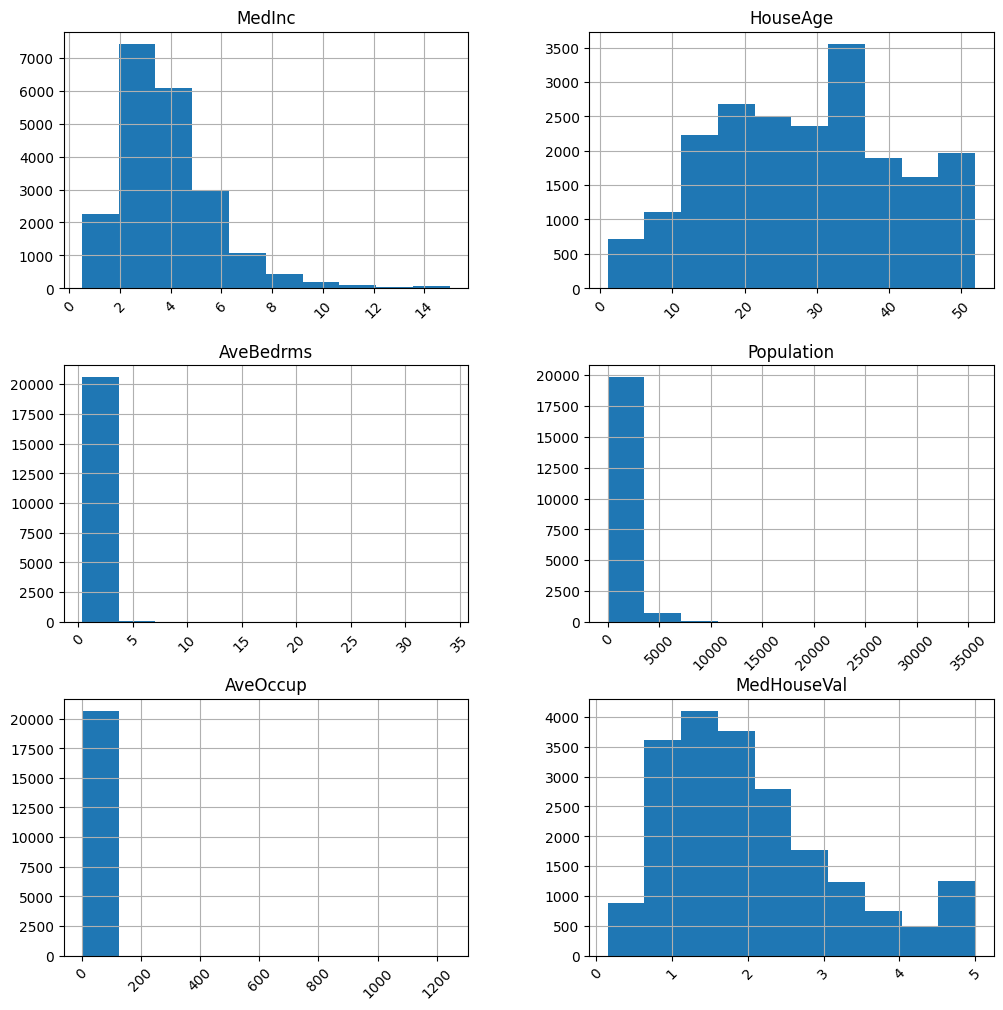

In [34]:
#Histplot to check the skewness
df3_vif.hist(figsize=(12,12), xrot=45)
plt.show()

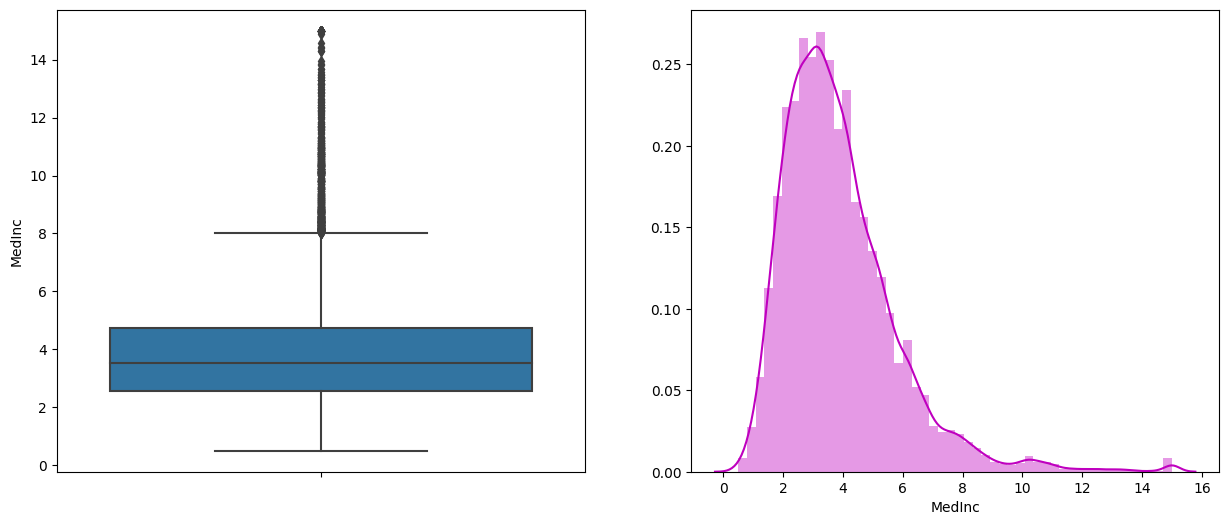

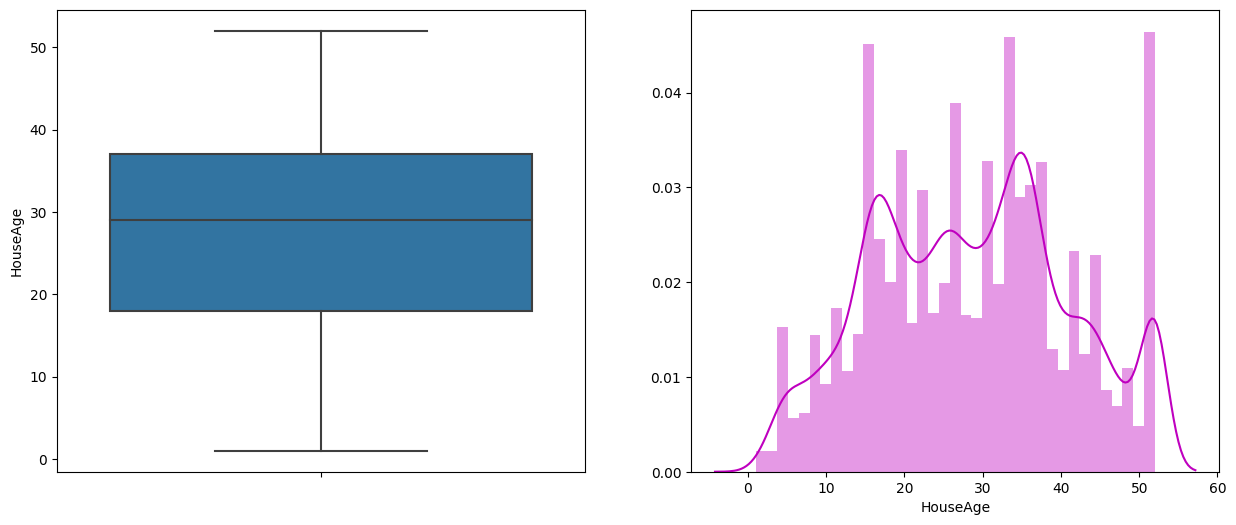

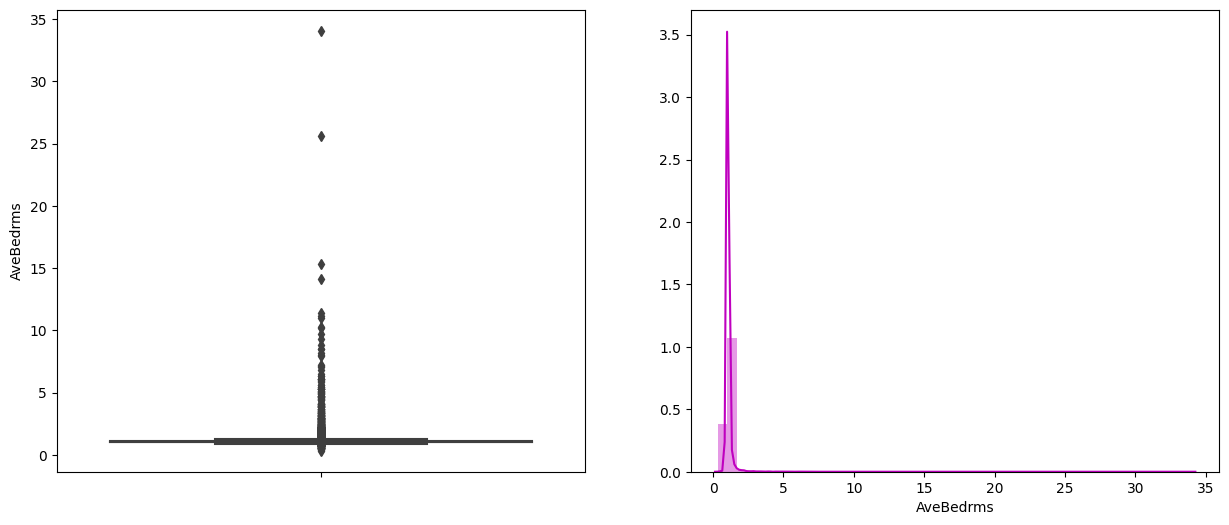

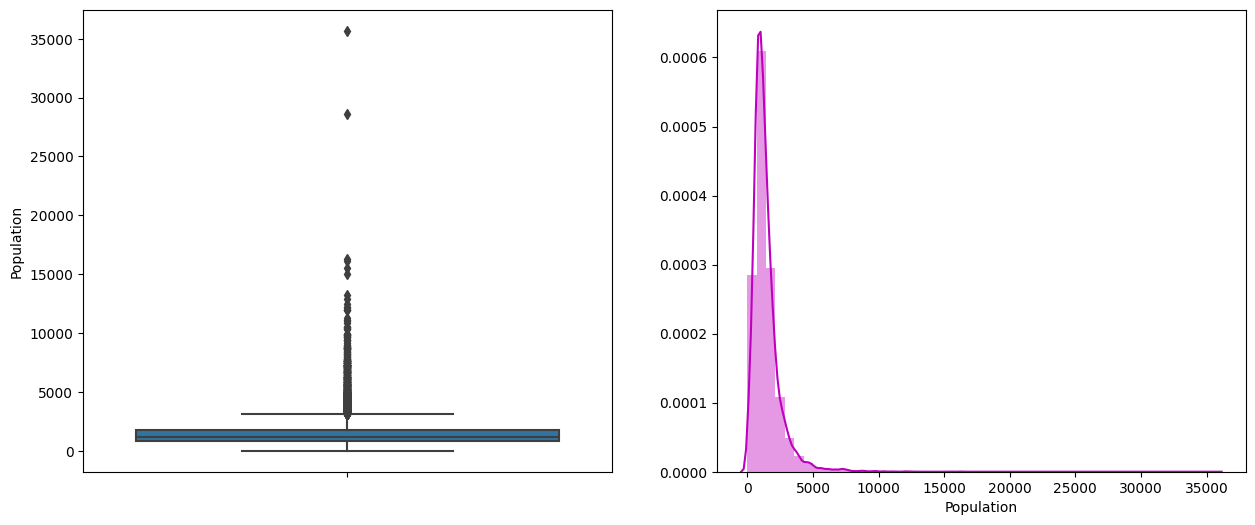

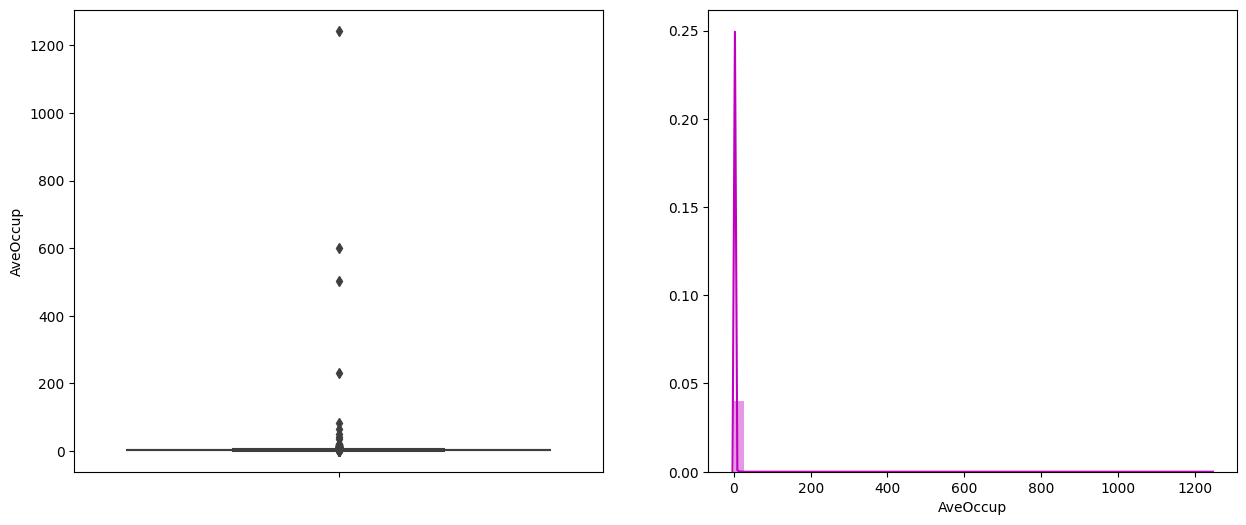

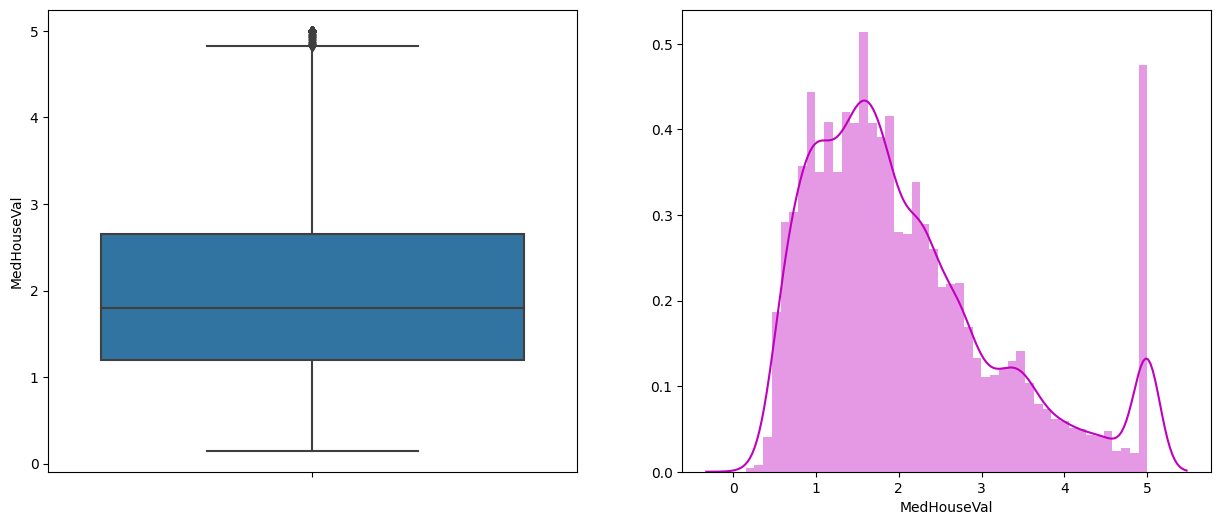

In [35]:
#Box plot with distplot 
numeric_features = df3_vif.describe().columns
numeric_features

for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df3_vif[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna(),color="m")
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

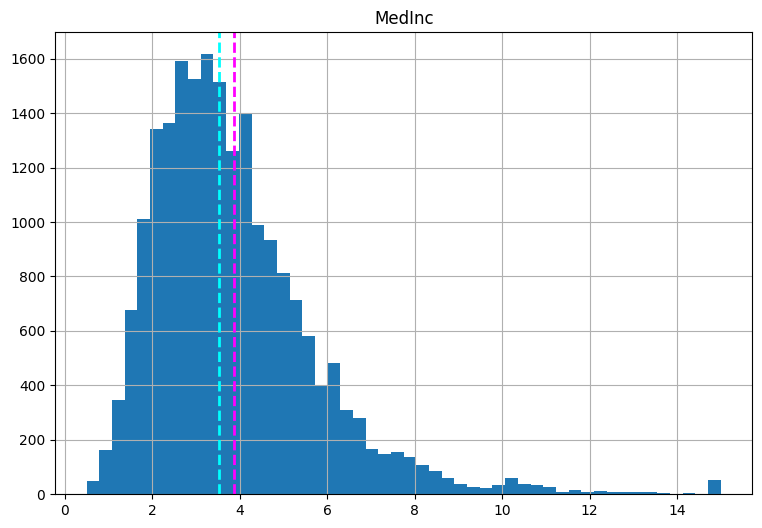

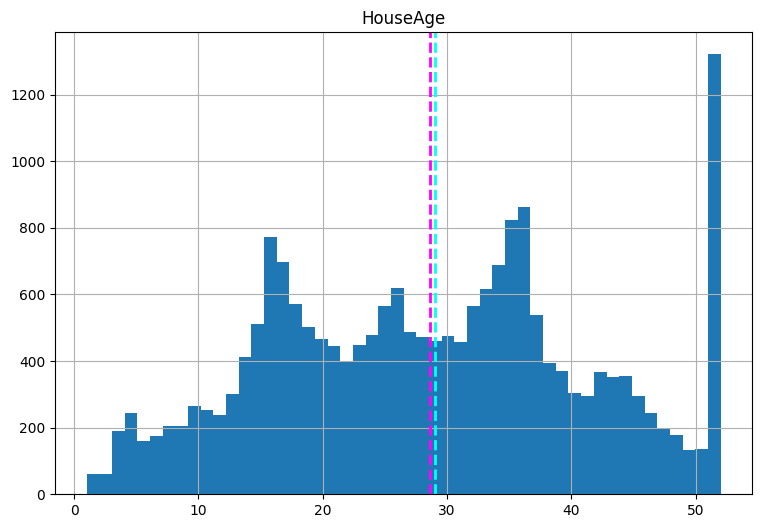

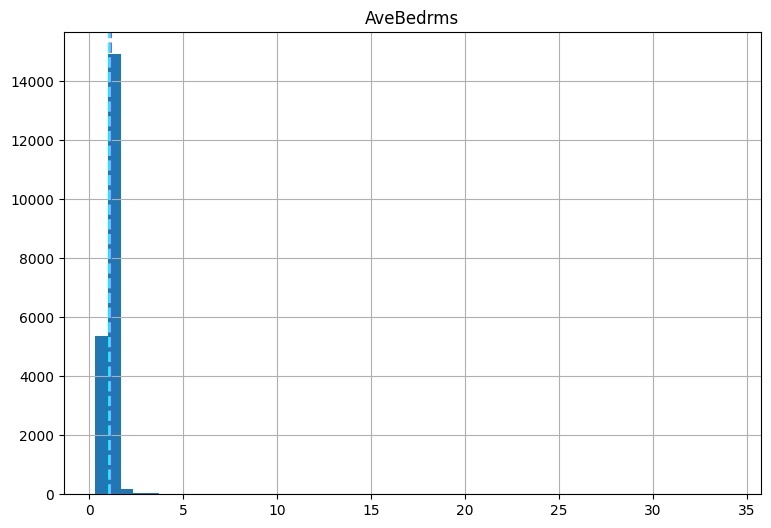

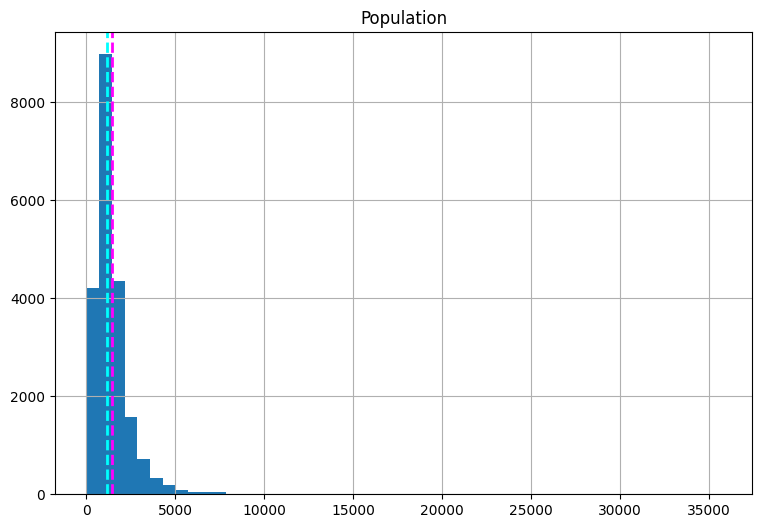

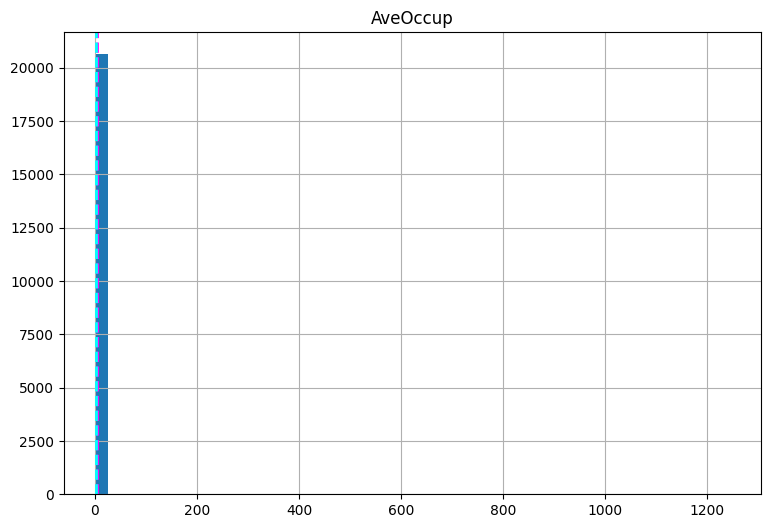

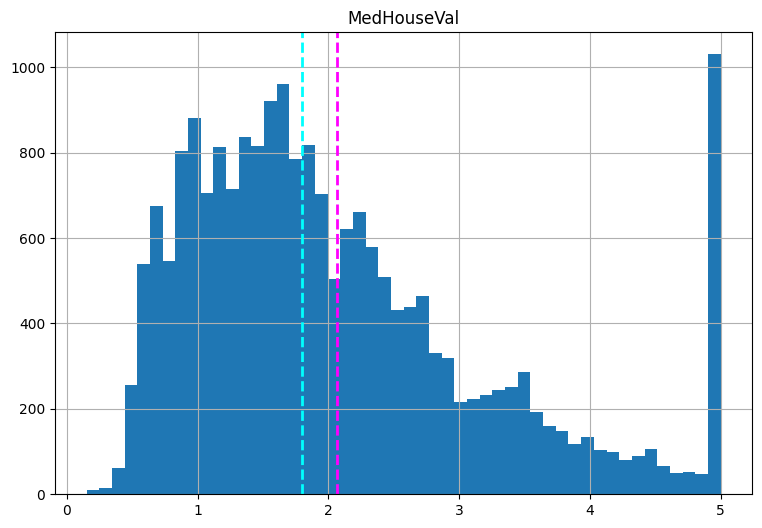

In [36]:
# plot a bar plot for each numerical feature count

numeric_features = df3_vif.describe().columns
numeric_features
     
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df3_vif[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
     

In [39]:
#here appling min max scaling on dataframe.
#applying min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3_vif[['AveOccup','Population','AveBedrms','HouseAge','MedInc']] = scaler.fit_transform(df3_vif[['AveOccup','Population','AveBedrms','HouseAge','MedInc']])
df3_vif.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,MedHouseVal
0,0.539668,0.784314,0.020469,0.008941,0.001499,4.526
1,0.538027,0.392157,0.018929,0.067210,0.001141,3.585
2,0.466028,1.000000,0.021940,0.013818,0.001698,3.521
3,0.354699,1.000000,0.021929,0.015555,0.001493,3.413
4,0.230776,1.000000,0.022166,0.015752,0.001198,3.422


In [41]:
df3_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveBedrms    20640 non-null  float64
 3   Population   20640 non-null  float64
 4   AveOccup     20640 non-null  float64
 5   MedHouseVal  20640 non-null  float64
dtypes: float64(6)
memory usage: 967.6 KB


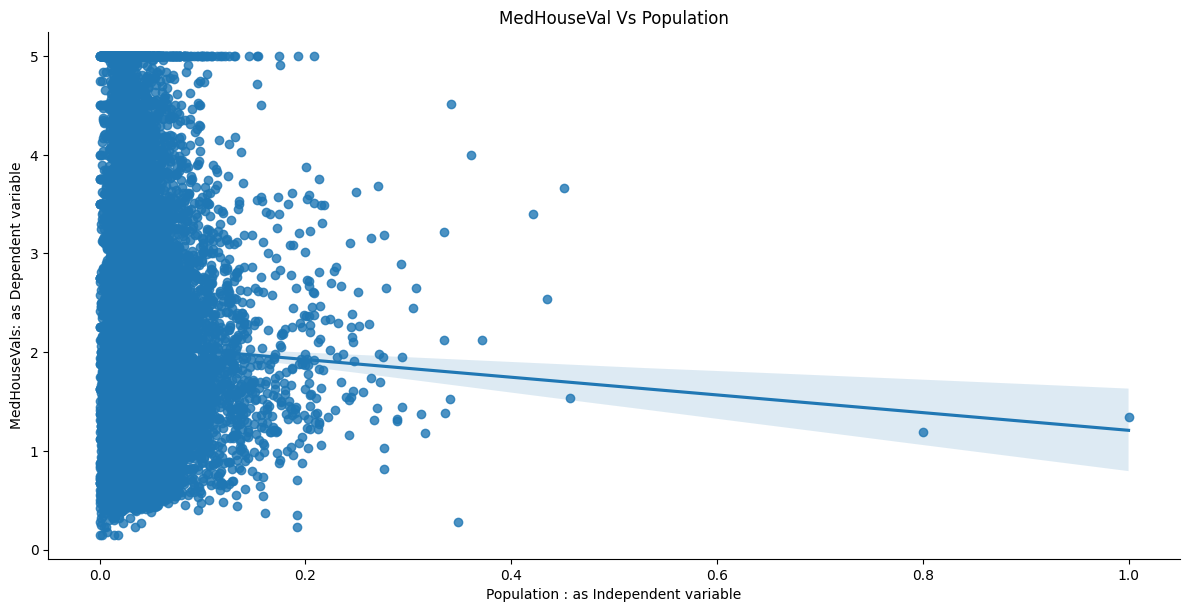

In [46]:
sns.lmplot(x='Population',y='MedHouseVal',data=df3_vif,aspect=2,height=6)
plt.xlabel('Population : as Independent variable')
plt.ylabel('MedHouseVals: as Dependent variable')
plt.title('MedHouseVal Vs Population');

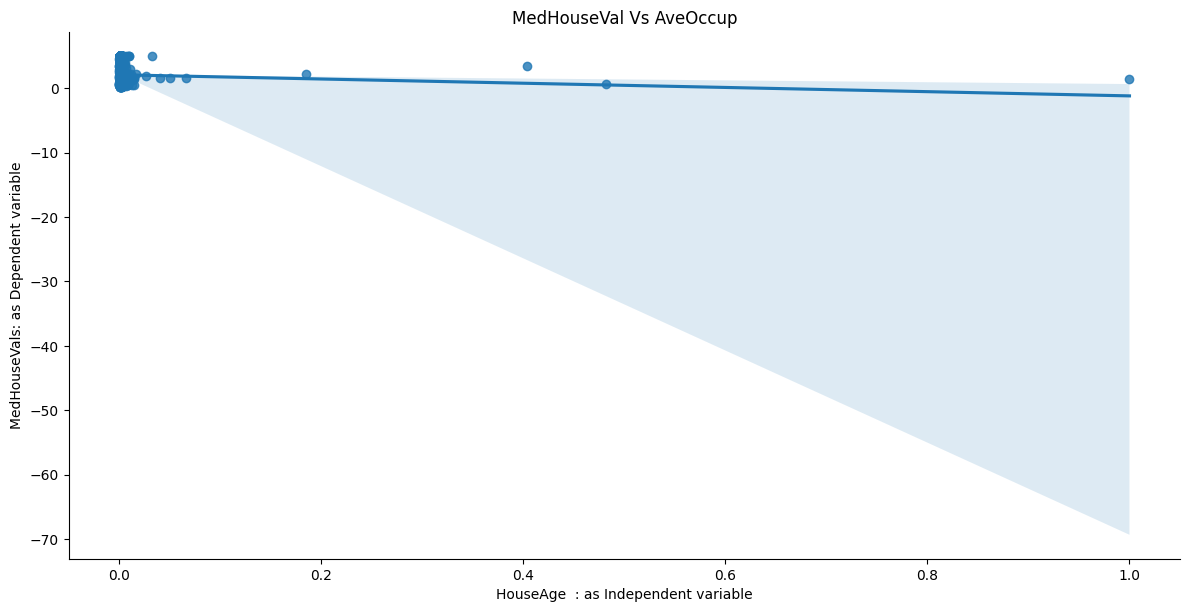

In [45]:
sns.lmplot(x='AveOccup',y='MedHouseVal',data=df3_vif,aspect=2,height=6)
plt.xlabel('HouseAge  : as Independent variable')
plt.ylabel('MedHouseVals: as Dependent variable')
plt.title('MedHouseVal Vs AveOccup');

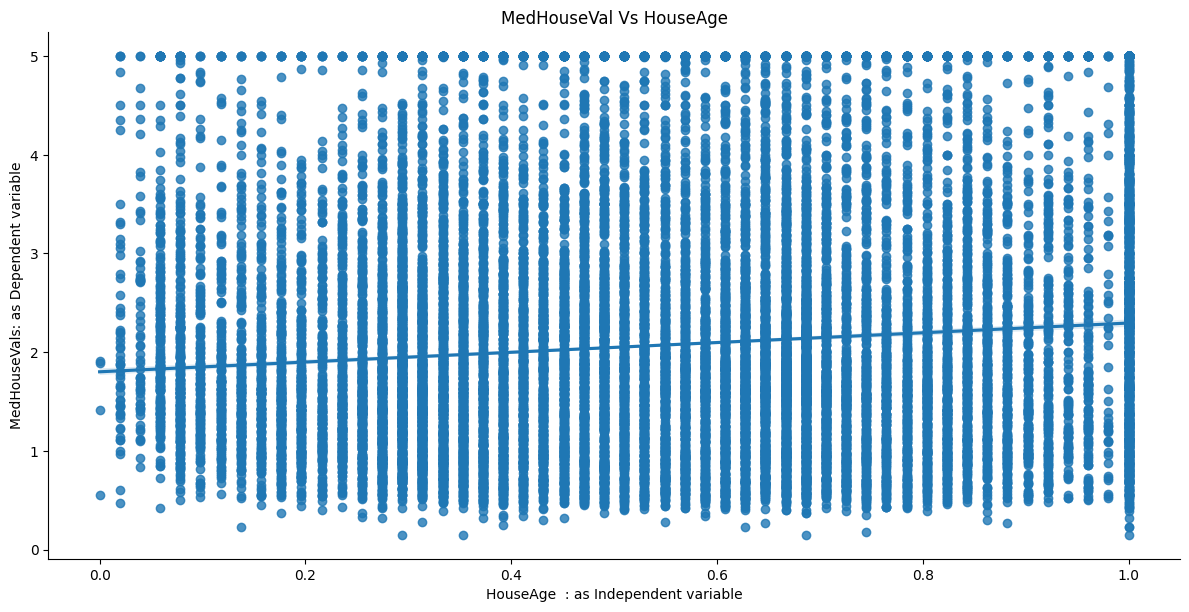

In [43]:
sns.lmplot(x='HouseAge',y='MedHouseVal',data=df3_vif,aspect=2,height=6)
plt.xlabel('HouseAge  : as Independent variable')
plt.ylabel('MedHouseVals: as Dependent variable')
plt.title('MedHouseVal Vs HouseAge');

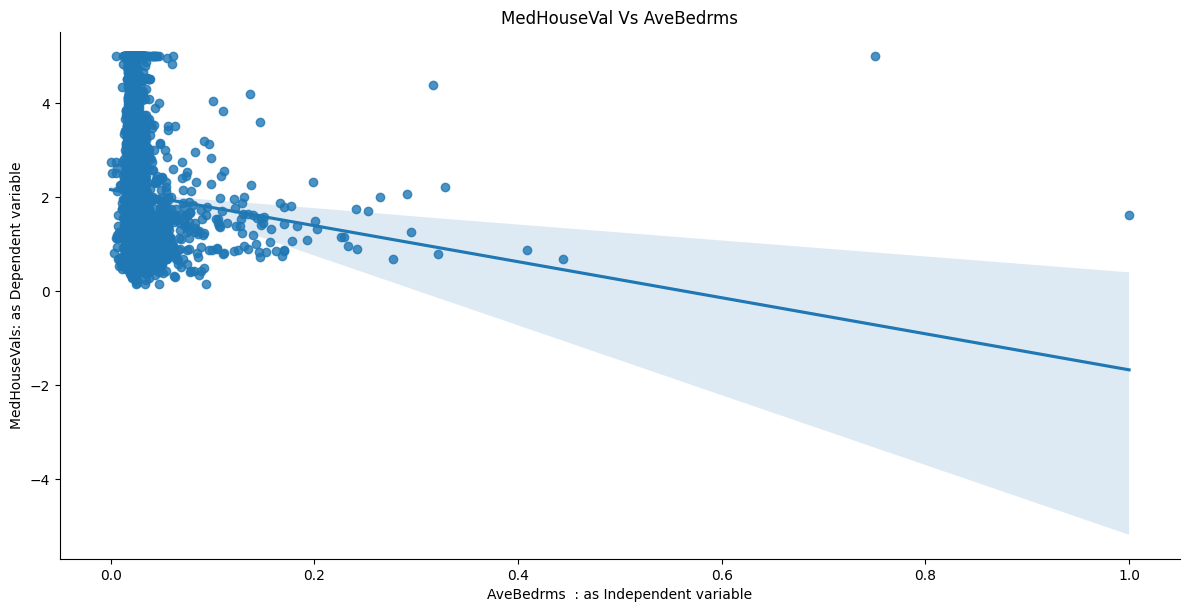

In [44]:
sns.lmplot(x='AveBedrms',y='MedHouseVal',data=df3_vif,aspect=2,height=6)
plt.xlabel('AveBedrms  : as Independent variable')
plt.ylabel('MedHouseVals: as Dependent variable')
plt.title('MedHouseVal Vs AveBedrms');

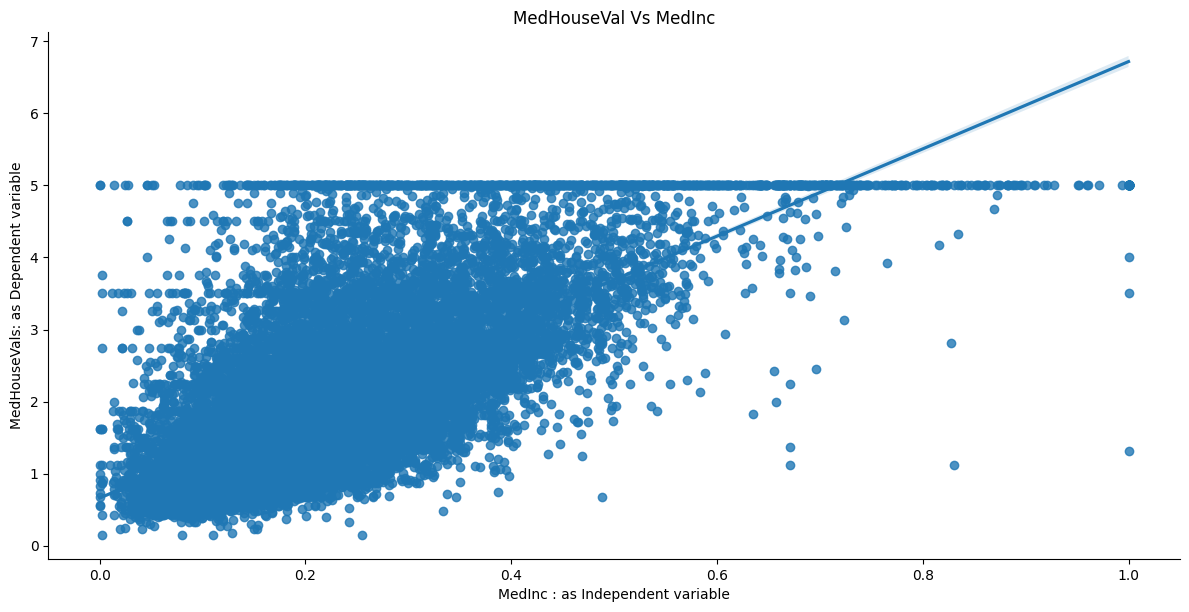

In [42]:
sns.lmplot(x='MedInc',y='MedHouseVal',data=df3_vif,aspect=2,height=6)
plt.xlabel('MedInc : as Independent variable')
plt.ylabel('MedHouseVals: as Dependent variable')
plt.title('MedHouseVal Vs MedInc');

In [47]:
#Importing required libraries.
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [48]:
#Train-Test split and training of model with training data.
X = df3_vif.drop(["MedHouseVal"],axis=1)
y = df3_vif.MedHouseVal
     

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train = regr.predict(X_train)
y_pred_train 

array([1.77134447, 2.72738205, 2.03532959, ..., 1.80013935, 2.9267898 ,
       0.72288451])

In [50]:
MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 0.6455261379712113
RMSE= 0.8034464126319883
R2_Score= 0.5176779109700802


In [51]:
X = df3_vif.drop(["MedHouseVal"],axis=1)
y = df3_vif.MedHouseVal
    

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_test = regr.predict(X_test)
     

y_pred_test
     

array([2.06573143, 2.95248339, 2.28774896, ..., 1.43659129, 2.85019533,
       2.26312211])

In [52]:
MSE_test = mean_squared_error(y_test,y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, y_pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 0.6697845423679839
RMSE= 0.8184036549087399
R2_Score= 0.4863437829184243


In [ ]:
########################################################################outliers removing...linear_regression 

In [53]:
df4_out=df3_vif.copy()

In [54]:
#here appling min max scaling on dataframe.
#applying min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4_out[['AveOccup','Population','AveBedrms','HouseAge','MedInc']] = scaler.fit_transform(df4_out[['AveOccup','Population','AveBedrms','HouseAge','MedInc']])
df4_out.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,MedHouseVal
0,0.539668,0.784314,0.020469,0.008941,0.001499,4.526
1,0.538027,0.392157,0.018929,0.067210,0.001141,3.585
2,0.466028,1.000000,0.021940,0.013818,0.001698,3.521
3,0.354699,1.000000,0.021929,0.015555,0.001493,3.413
4,0.230776,1.000000,0.022166,0.015752,0.001198,3.422


In [55]:
#for removing outlier we are using following method and that is represented as follow
Q1 = df4_out.quantile(0.25)
Q3 = df4_out.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df4_out = df4_out[~((df4_out < (Q1 - 1.5 * IQR)) |(df4_out > (Q3 + 1.5 * IQR))).any(axis=1)]
df4_out.shape

MedInc         0.150332
HouseAge       0.372549
AveBedrms      0.002770
Population     0.026290
AveOccup       0.000686
MedHouseVal    1.451250
dtype: float64


(16365, 6)

In [56]:
df.shape

(20640, 9)

In [57]:
#Importing required libraries.
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [58]:
#Train-Test split and training of model with training data.
X = df4_out.drop(["MedHouseVal"],axis=1)
y = df4_out.MedHouseVal
     

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train = regr.predict(X_train)
y_pred_train 

array([1.34968461, 1.75733151, 1.26265609, ..., 2.92808881, 1.7512968 ,
       1.19752353])

In [59]:
MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 0.426675165270733
RMSE= 0.6532037700983767
R2_Score= 0.5198902910602097


In [60]:
X = df4_out.drop(["MedHouseVal"],axis=1)
y = df4_out.MedHouseVal
    

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_test = regr.predict(X_test)
     

y_pred_test
     

array([2.19299488, 1.8114385 , 2.97207774, ..., 3.24330825, 1.20991429,
       0.79291579])

In [61]:
MSE_test = mean_squared_error(y_test,y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, y_pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 0.43349677964323696
RMSE= 0.6584047232844225
R2_Score= 0.5224029701261339


In [ ]:
###################################################################################################